## MachineLearningEngine Class

The MachineLearningEngine class is builds on the CoreEngine class. The CoreEngine class serves as a parent class engines that focus on data, while the MachineLearningEngine class is for engines that focus on learning from data.

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine

#Creates an empty MachineLearningEngine object and prints it
engine = MachineLearningEngine()
engine.print()

## MachineLearningAnalysis Class

The MachineLearningAnalysis class is builds on the class Analysis. The Analysis class that is used to perform analysis on the data. 

In [ ]:
from src.StreamPort.ml.MachineLearningAnalysis import MachineLearningAnalysis

#Creates an empty MachineLearningAnalysis obejct and prints it
analysis = MachineLearningAnalysis()
analysis.print()

#### Load the CSV File  

This method loads the dataset from csv file and create a list of analysis object. Used the data to make a matrix with the analysis names and visualizes the results using a scatter plot.  

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

#Creates an empty MachineLearningEngine object and prints it
path = 'feature_list.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

engine.print()

print("Create a list of analysis object and prints it" )
for analysis in engine._analyses:
    print(f"Analysis: {analysis.name}")
    for key, value in analysis.data.items():
        print(f"{key}: {value}")
    print("\n")

rownames = engine.get_analyses_names()
print("Analysename: ", rownames)

mat = engine.get_data()
mat.index = rownames
print("Matrix: \n", mat)


#### Make a Principle Conponent Analysis (PCA)

The method implements a machine learning engine that perfporms PCA on the dataset and visualizes the results. ProcessingSetting is the parent of MakePCA. The ProcessingSettings used to assemble data processing workflows within the each engine. The subclass MakePCASKL of MakePCA using skitklearn algorithm to perform the PCA.

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import  MakeModelPCASKL
import webbrowser

#Creates an empty MachineLearningEngine object and prints it
path = 'feature_list.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

class_path = 'feature_metadata.csv'
engine.add_classes_from_csv(class_path)

engine.print()
#print(engine.get_classes())

# !!! make a general data plot
engine.plot_data()
webbrowser.open('general_data_plot.html')
# x axis in the index of the features (i.e., col names)
# y axis is the valule for each analysis
# color legend is applied for each analysis


# Add the ProcessingSettings to the _settings attribute with add settings
pca_model = MakeModelPCASKL(n_components = 2, center_data= True)
engine.add_settings(pca_model)
engine.print()
# Create a method in the ML engine to perfom PCA and collect the results
engine.run_workflow()
# The results are added to the _results atribute of the engine
# make a plot method in the ML engine for the PCA results and classes
engine.plot_pca()
webbrowser.open('pca_scores_plot.html')
webbrowser.open('pca_loadings_plot.html')
# make a loadings plot after confirming the scores plot


#### Make a Density-Based Spatial Clustering of Application with Noise (DBSCAN)



Structure of the CSV file: {'number_of_rows': 45, 'number_of_columns': 4445}
Structure of the CSV file: {'number_of_rows': 45, 'number_of_columns': 2}

MachineLearningEngine 
  name: None 
  author: None 
  path: None 
  date: 2024-08-10 08:22:37.521359 
  analyses: 45 
  settings: 0 

Reduced data shape: (45, 2)


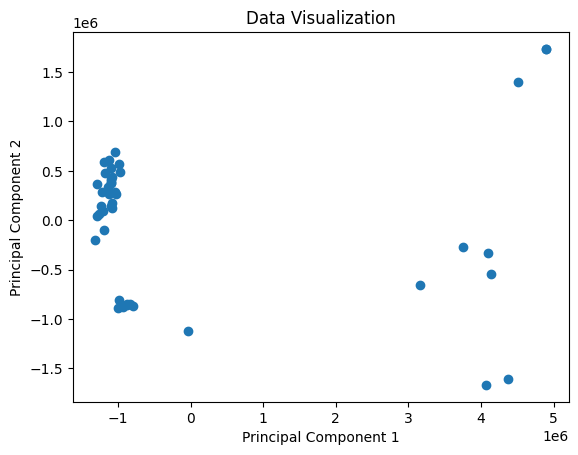

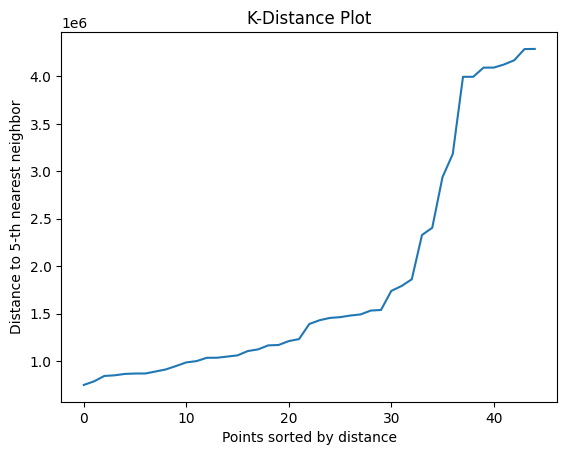

Estimated number of clusters: 3
Estimated number of noise points: 0


In [1]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import  MakeModelDBSCANSKL

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

# Creates an empty MachineLearningEngine object and prints it
path = 'feature_list.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

class_path = 'feature_metadata.csv'
engine.add_classes_from_csv(class_path)

engine.print()

data = engine.get_data()
mean = np.mean(data, axis=0)
data = data - mean

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
print("Reduced data shape:", data_2d.shape)

# Visualize the data
plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.title('Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Create a k-distance plot
k = 5  # Choose k based on min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances[:, k-1], axis=0)

plt.plot(distances)
plt.title('K-Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to {}-th nearest neighbor'.format(k))
plt.show()

# Experiment with DBSCAN parameters
eps = 1.5E6  # Adjust based on the k-distance plot
min_samples = 3  # Adjust based on your data

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data_2d)

labels = dbscan.labels_

# Analyze the clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Create a DataFrame for Plotly
df = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
df['Cluster'] = labels.astype(str)  # Convert to string for categorical coloring

# Plot the results using Plotly
fig = px.scatter(df, x='PC1', y='PC2', color='Cluster', title='DBSCAN Clustering Results',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'})

fig.show()
